<a href="https://colab.research.google.com/github/Vineesha2005/ADM1873/blob/main/Assignment-8(titanic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

# Load the Titanic dataset
df_titanic = pd.read_csv("/content/Titanic_dataset.csv")

# Display the first few rows
print(df_titanic.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked AgeGroup  
0      0         A/5 21171   7.2500   NaN        S    Adult  
1      0          PC 17599  71.2833   C85        C    Adult  
2      0  STON/O2. 3101282   7.9250   NaN        S    Adult  
3      0            113803  53.1000  C123        S    Adult  
4      0  

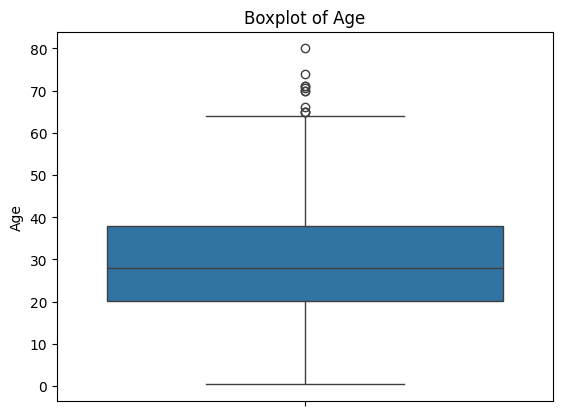

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for 'Age' column
sns.boxplot(df_titanic['Age'])
plt.title("Boxplot of Age")
plt.show()

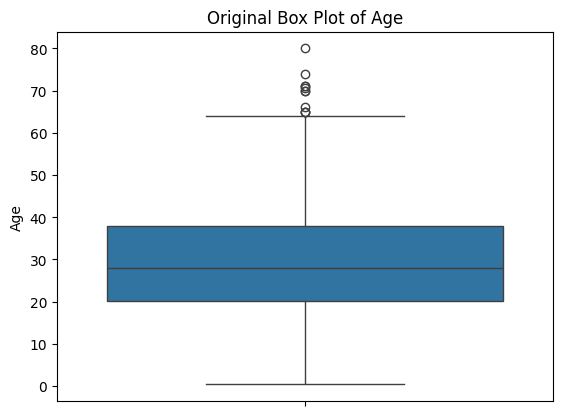

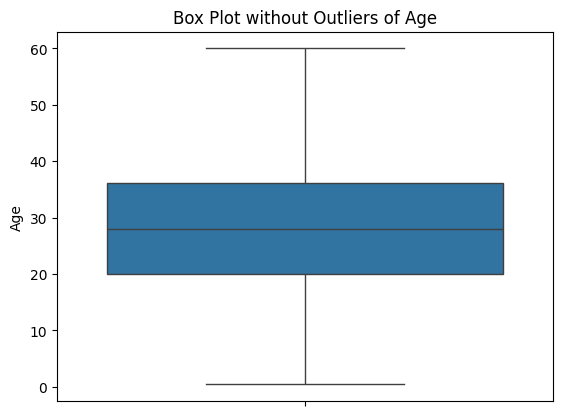

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

def removal_box_plot(df, column, threshold):
    sns.boxplot(df[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()

    removed_outliers = df[df[column] <= threshold]

    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()

    return removed_outliers

threshold_value = 60  # Example threshold for 'Age'
df_no_outliers = removal_box_plot(df_titanic, 'Age', threshold_value)

In [6]:
import numpy as np
import pandas as pd

# Drop NaN values in 'Age'
df_titanic = df_titanic.dropna(subset=['Age'])

# Calculate IQR
Q1, Q3 = df_titanic['Age'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

# Identify outliers
outliers = df_titanic[(df_titanic['Age'] < lower) | (df_titanic['Age'] > upper)]
print("Outliers:\n", outliers)

Outliers:
      PassengerId  Survived  Pclass                                  Name  \
33            34         0       2                 Wheadon, Mr. Edward H   
54            55         0       1        Ostby, Mr. Engelhart Cornelius   
96            97         0       1             Goldschmidt, Mr. George B   
116          117         0       3                  Connors, Mr. Patrick   
280          281         0       3                      Duane, Mr. Frank   
456          457         0       1             Millet, Mr. Francis Davis   
493          494         0       1               Artagaveytia, Mr. Ramon   
630          631         1       1  Barkworth, Mr. Algernon Henry Wilson   
672          673         0       2           Mitchell, Mr. Henry Michael   
745          746         0       1          Crosby, Capt. Edward Gifford   
851          852         0       3                   Svensson, Mr. Johan   

      Sex   Age  SibSp  Parch      Ticket     Fare Cabin Embarked  \
33   ma

In [7]:
# Capping outliers in 'Age'
df_titanic['Age'] = np.clip(df_titanic['Age'], lower, upper)

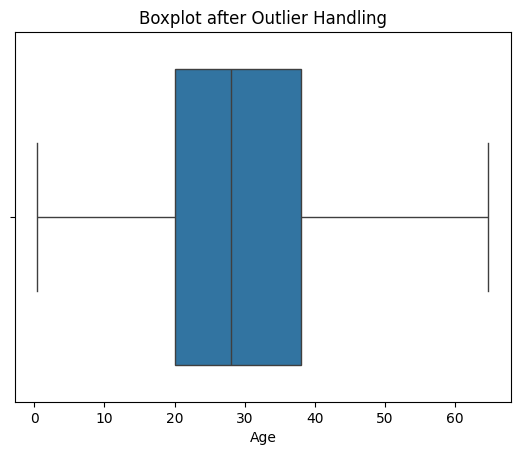

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df_titanic['Age'])
plt.title("Boxplot after Outlier Handling")
plt.show()